In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy.stats import boxcox


In [150]:
data = pd.read_excel('C:/Users/ivanr/OneDrive/Radna površina/marketing_customer_analysis.xlsx')

In [151]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [152]:
data.shape

(9134, 24)

In [153]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [154]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [155]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [156]:
data = data.drop(['Customer'], axis =1)

In [157]:
data.shape

(9134, 23)

In [158]:
lower_col = []
for col in data.columns:
    lower_col.append(col.lower().replace(' ', '_'))


In [159]:
data.columns = lower_col

In [160]:
data.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [161]:
data.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [162]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])

In [163]:
data['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [164]:
data_duplicates=data.duplicated().any()
data_duplicates

True

In [165]:
data = data.drop_duplicates()

In [166]:
data.shape


(8971, 23)

In [167]:
data.reset_index()

,index,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8966,9128,California,4100.398533,No,Premium,College,2011-01-06,Employed,F,47761,...,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
8967,9129,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
8968,9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
8969,9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [168]:
data.select_dtypes(np.object).columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [169]:
for categorical_col in data.select_dtypes(np.object).columns:
    print("column name: ", categorical_col)
    print(data[categorical_col].value_counts())
    print('\n')

column name:  state
California    3081
Oregon        2543
Arizona       1682
Nevada         872
Washington     793
Name: state, dtype: int64


column name:  response
No     7826
Yes    1145
Name: response, dtype: int64


column name:  coverage
Basic       5469
Extended    2697
Premium      805
Name: coverage, dtype: int64


column name:  education
Bachelor                2704
College                 2631
High School or Below    2575
Master                   728
Doctor                   333
Name: education, dtype: int64


column name:  employmentstatus
Employed         5604
Unemployed       2296
Medical Leave     420
Disabled          397
Retired           254
Name: employmentstatus, dtype: int64


column name:  gender
F    4579
M    4392
Name: gender, dtype: int64


column name:  location_code
Suburban    5656
Rural       1751
Urban       1564
Name: location_code, dtype: int64


column name:  marital_status
Married     5210
Single      2434
Divorced    1327
Name: marital_status, dtype:

In [170]:
def grouped_policy(x):
    if 'Personal' in x:
        return 'personal'
    if 'Corporate' in x:
        return 'corporate'
    if 'Special' in x:
        return 'special'

In [171]:
data['policy'] = list(map(grouped_policy, data['policy']))

In [172]:
data.shape

(8971, 23)

In [173]:
def vehicle_class_clean(x):
    if 'Sports Car'in x:
        return 'Luxury'
    elif 'Luxury SUV' in x:
        return 'Luxury'
    elif 'Luxury Car' in x:
        return 'Luxury'
    elif 'Four-Door Car' in x:
        return 'Four-Door'
    elif 'Two-Door Car' in x:
        return 'Two-Door'
    else:
        return 'SUV'
    
        
        

In [174]:
data['vehicle_class'] = list(map(vehicle_class_clean, data['vehicle_class']))

customer_lifetime_value


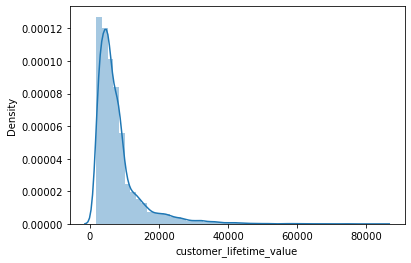

income


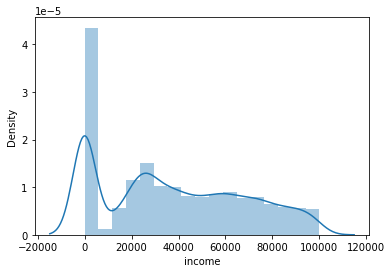

monthly_premium_auto


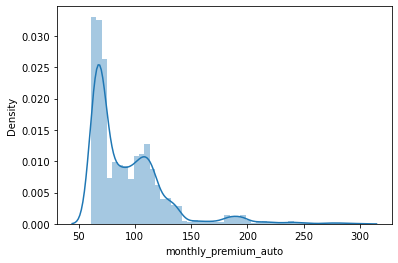

months_since_last_claim


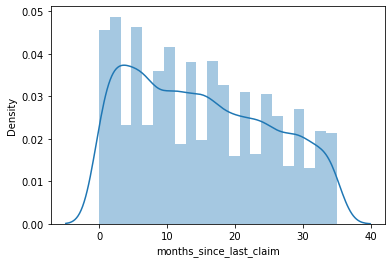

months_since_policy_inception


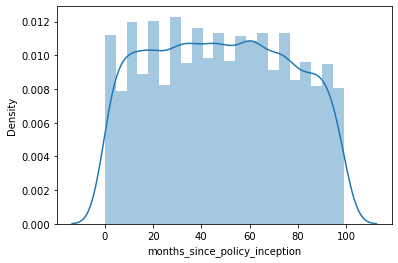

number_of_open_complaints


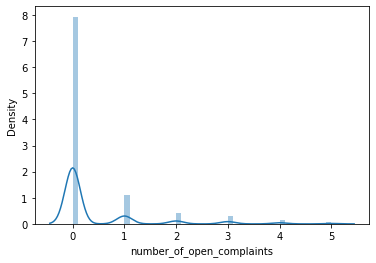

number_of_policies


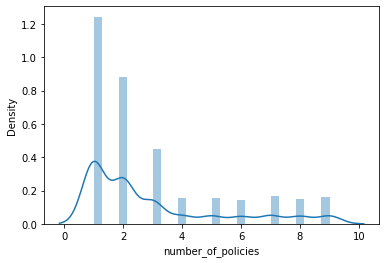

total_claim_amount


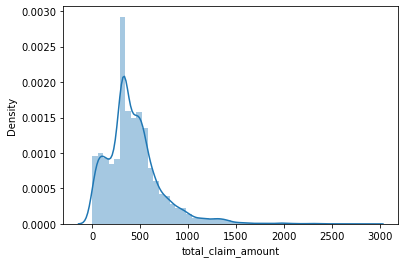

In [175]:
for numerical_col in data.select_dtypes(np.number).columns:
    print(numerical_col)
    sns.distplot(data[numerical_col])
    plt.show()

In [176]:
IQR = np.percentile(data['customer_lifetime_value'], 75)- np.percentile(data['customer_lifetime_value'], 25)

In [ ]:
u_limit = np.percentile(data['customer_lifetime_value'], 75) + 3*IQR
l_limit = np.percentile(data['customer_lifetime_value'], 25) - 1.5*IQR

In [177]:
data.shape

(8971, 23)

In [178]:
data = data[(data['customer_lifetime_value']<u_limit) & (data['customer_lifetime_value']>l_limit)]
data = data.reset_index(drop=True)

In [180]:
data.shape

(8610, 23)

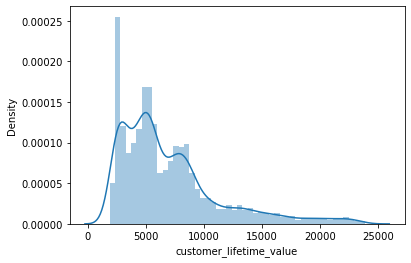

In [181]:
sns.distplot(data['customer_lifetime_value'])
plt.show()

In [182]:
def log_transform(x):
    if x<=0:
        return 0
    else:
        return np.log(x)

In [183]:
temp = list(map(log_transform, data['customer_lifetime_value']))

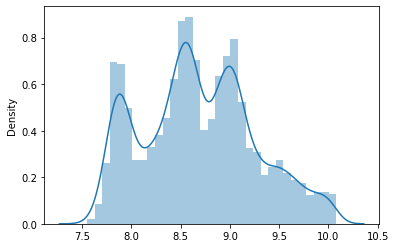

In [185]:
sns.distplot(temp)
plt.show()

In [187]:
def sq_rt_transform(x):
    if x<0:
        return 0
    else:
        return x**0.5

In [188]:
temp = list(map(sq_rt_transform, data['customer_lifetime_value']))

<AxesSubplot:ylabel='Density'>

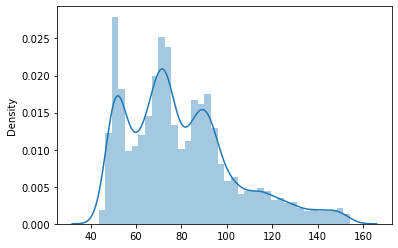

In [189]:
sns.distplot(temp)

In [197]:
reciprocal_cltv = 1/data['customer_lifetime_value']

<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

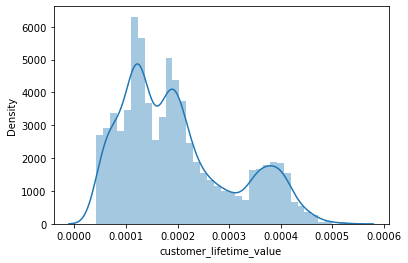

In [198]:
sns.distplot(reciprocal_cltv)

In [199]:
data['customer_lifetime_value'] = list(map(log_transform, data['customer_lifetime_value']))

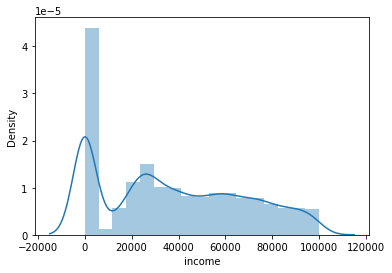

In [201]:
sns.distplot(data['income'])
plt.show()

In [202]:
temp = list(map(log_transform, data['income']))

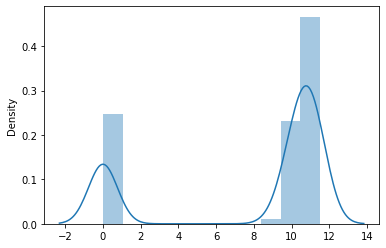

In [204]:
sns.distplot(temp)
plt.show()

In [128]:
def sq_rt_transform(x):
    if x<0:
        return 0
    else:
        return x**0.5

In [129]:
temp = list(map(sq_rt_transform, data['income']))

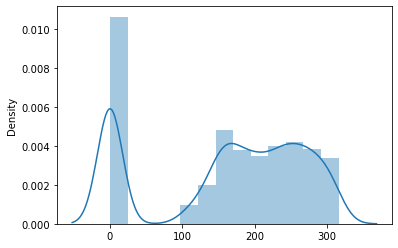

In [131]:
sns.distplot(temp)
plt.show()

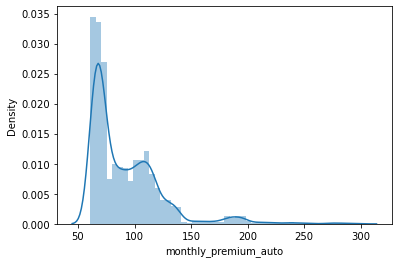

In [207]:
sns.distplot(data['monthly_premium_auto'])
plt.show()


In [210]:
IQR = np.percentile(data['monthly_premium_auto'], 75)- np.percentile(data['monthly_premium_auto'], 25)

In [211]:
u_limit = np.percentile(data['monthly_premium_auto'], 75) + 3*IQR
l_limit = np.percentile(data['monthly_premium_auto'], 25) - 1.5*IQR

In [212]:
outliers = data[(data['monthly_premium_auto']>u_limit) | (data['monthly_premium_auto']<l_limit)]
outliers.shape

(66, 23)

In [213]:
outliers.shape[0]/data.shape[0]*100

0.7665505226480837

In [214]:
data = data[(data['monthly_premium_auto']<u_limit) & (data['monthly_premium_auto']>l_limit)]
data = data.reset_index(drop=True)

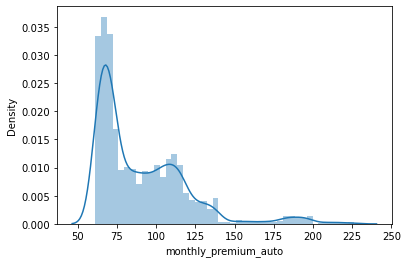

In [215]:
sns.distplot(data['monthly_premium_auto'])
plt.show()

In [230]:
temp = list(map(sq_rt_transform, data['monthly_premium_auto']))

<AxesSubplot:ylabel='Density'>

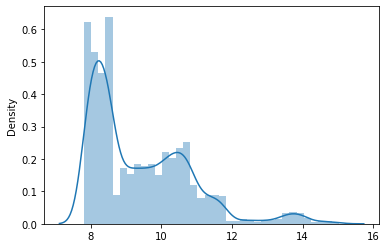

In [231]:
sns.distplot(temp)

In [226]:
temp = list(map(log_transform, data['monthly_premium_auto']))

<AxesSubplot:ylabel='Density'>

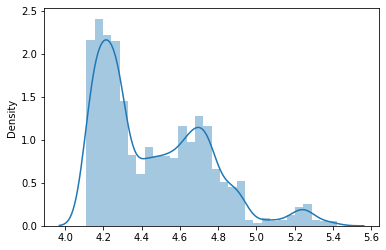

In [227]:
sns.distplot(temp)

In [232]:
reciprocal_mpa = 1/data['monthly_premium_auto']

<AxesSubplot:xlabel='monthly_premium_auto', ylabel='Density'>

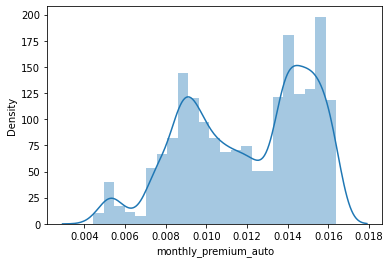

In [233]:
sns.distplot(reciprocal_mpa)

In [234]:
data['monthly_premium_auto'] = list(map(log_transform, data['monthly_premium_auto']))

In [236]:
data_correlation = data.corr()

<AxesSubplot:>

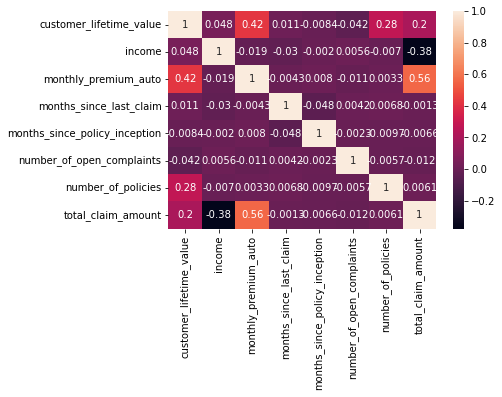

In [237]:
sns.heatmap(data_correlation, annot=True)

<AxesSubplot:xlabel='state', ylabel='total_claim_amount'>

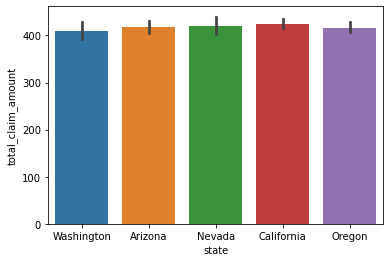

In [238]:
sns.barplot(x = 'state', y = 'total_claim_amount', data = data)

In [239]:
data = data.drop(['state'], axis = 1)

In [240]:
data.columns

Index(['customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

<AxesSubplot:xlabel='employmentstatus', ylabel='total_claim_amount'>

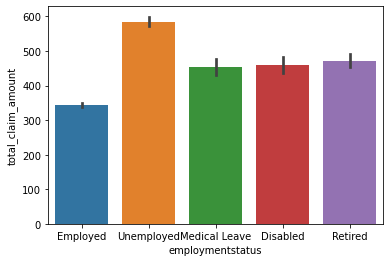

In [241]:
sns.barplot(x = 'employmentstatus', y = 'total_claim_amount', data = data)

<AxesSubplot:xlabel='response', ylabel='total_claim_amount'>

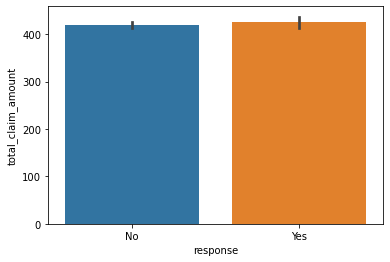

In [242]:
sns.barplot(x = 'response', y = 'total_claim_amount', data = data)

In [243]:
data['number_of_policies'].unique()

array([1, 8, 2, 7, 9, 4, 3, 6, 5], dtype=int64)

In [244]:
y = data['total_claim_amount']
x = data.drop('total_claim_amount', axis = 1)

In [245]:
x.shape

(8543, 21)

In [246]:
len(y)

8543

In [248]:
numericals = x.select_dtypes(np.number)
categoricals = x.select_dtypes(np.object)

In [250]:
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,7.924260,56274,4.234107,32,5,0,1
1,8.850738,0,4.543295,13,42,0,8
2,9.464008,48767,4.682131,18,38,0,2
3,8.941920,0,4.663439,18,65,0,7
4,7.942253,43836,4.290459,12,44,0,1


In [253]:
numericals['number_of_open_complaints'].unique()

array([0, 2, 1, 3, 5, 4], dtype=int64)

In [255]:
numericals['number_of_open_complaints'].value_counts()

0    6765
1     951
2     353
3     276
4     145
5      53
Name: number_of_open_complaints, dtype: int64

In [257]:
scaled = StandardScaler().fit_transform(numericals)
scaled = pd.DataFrame(scaled)

In [258]:
scaled.head()

,0,1,2,3,4,5,6
0,-1.319119,0.610823,-0.795658,1.680325,-1.540240,-0.42477,-0.827003
1,0.309425,-1.232288,0.284402,-0.209082,-0.213921,-0.42477,2.056202
2,1.387420,0.364950,0.769388,0.288131,-0.357307,-0.42477,-0.415117
3,0.469704,-1.232288,0.704092,0.288131,0.610548,-0.42477,1.644316
4,-1.287492,0.203448,-0.598806,-0.308524,-0.142228,-0.42477,-0.827003


In [259]:
encoded = OneHotEncoder(drop='first').fit_transform(categoricals).toarray()
encoded = pd.DataFrame(encoded)

In [261]:
encoded.shape

(8543, 31)

In [262]:
scaled.shape

(8543, 7)

In [264]:
type(scaled)


pandas.core.frame.DataFrame

In [265]:
type(encoded)

pandas.core.frame.DataFrame

In [267]:
new_data = pd.concat([encoded, scaled], axis = 1)

In [268]:
x_train, x_test, y_train, y_test = train_test_split(new_data, y, test_size=.2, random_state=100)

In [269]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [270]:
predictions = lm.predict(x_test)

In [271]:
predictions[:10]

array([615.59805602,  -5.12661465, 357.08085026, 500.56365771,
       592.02478016, 342.75259464, 307.53167998, 498.7114586 ,
       532.15334332, 427.54182164])

In [272]:
y_test[:10]

6408    723.301363
995     144.782152
189     364.800000
766     312.000000
2242    494.400000
2213    326.400000
8064    292.800000
1254    316.800000
4902    480.000000
6173    331.200000
Name: total_claim_amount, dtype: float64

In [273]:
mse = mean_squared_error(predictions, y_test)
mse

19776.537100117996

In [274]:
rmse = mse**.5
rmse

140.62907629689528

In [280]:
mae = mean_absolute_error(predictions, y_test)
mae

94.9915884487754

In [282]:
r2 = r2_score(predictions, y_test)
r2

0.6180176181896817